# Problem 1

### 1.1
H(y) = 6/10log(10/6) + 4/10log(10/4) = 0.97 bits

### 1.2
Information gain for X1: 0.97095 - (4/10(3/4log(4/3)+1/4log(4)) + 6/10(1/2log(2) + 1/2log(2))) = 0.05 bits

Information gain for X2: 0.97095 - (5/10(1/5log(5)+4/5log(5/4)) + 5/10(6log6 + 0log0)) = 0.61 bits

Information gain for X3: 0.97095 - (3/10(2/3log(3/2)+1/3log(3)) + 7/10(4/7log(7/4) + 3/7log(7/3))) = 0.01 bits

Information gain for X4: 0.97095 - (3/10(1/3log(3)+2/3log(3/2)) +7/10(5/7log(7/5)+2/7log(7/2))) = 0.09 bits

Information gain for X5: 0.97095 - (7/10(4/7log(7/4)+3/7log(7/3)) +3/10(2/3log(3/2)+1/3log(3))) = 0.01 bits

Based on the information gain, we will select feature 2 to split on for the root node

### 1.3
Decision tree in if-else:

if (the email is long):

    do not read
    
else:

    if (the author is known):
    
        read
        
    else:
    
        if (the email contain word "grade"):
        
            do not read
            
        else:
        
            read

# Problem 2

### 2.1

In [1]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
np.random.seed(0)

X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')
X,Y = ml.shuffleData(X,Y)
X = X[:,:41] # keep only the numeric features for now

for i in range(5):
    print(f"Minimum of feature {i+1}: {np.min(X[:, i])}")
    print(f"Maximum of feature {i+1}: {np.max(X[:, i])}")
    print(f"Mean of feature {i+1}: {np.mean(X[:, i])}")
    print(f"Variance of feature {i+1}: {np.var(X[:, i])}\n")

Minimum of feature 1: 0.0
Maximum of feature 1: 110285.0
Mean of feature 1: 1321.1174134446987
Variance of feature 1: 6747189.595085322

Minimum of feature 2: 0.0
Maximum of feature 2: 35.0
Mean of feature 2: 6.5916745251246125
Variance of feature 2: 34.70690630279573

Minimum of feature 3: 0.0
Maximum of feature 3: 51536.0
Mean of feature 3: 1152.273237235619
Variance of feature 3: 5376518.288798102

Minimum of feature 4: 0.0
Maximum of feature 4: 21768.0
Mean of feature 4: 234.8262548834703
Variance of feature 4: 260120.83053297663

Minimum of feature 5: 0.0
Maximum of feature 5: 27210.0
Mean of feature 5: 289.75871211100633
Variance of feature 5: 406615.8651128233



### 2.2

In [2]:
# Try to split in half; if not even, val has 1 more
split = (X.shape[0]) // 2
Xtr, Ytr = X[:split,:], Y[:split]
Xva, Yva = X[split:,:], Y[split:]
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50)
print("Training Error: ", learner.err(Xtr, Ytr))
print("Validation Error: ", learner.err(Xva, Yva))

Training Error:  0.0
Validation Error:  0.40867456896551724


### 2.3

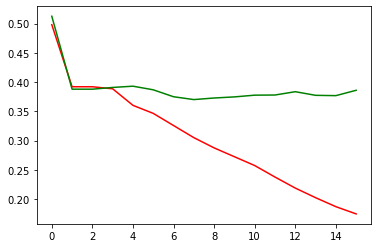

In [3]:
depth = [i for i in range(16)]
trainingError = []
validationError = []
for i in range(16):
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth = i)
    trainingError.append(learner.err(Xtr, Ytr))
    validationError.append(learner.err(Xva, Yva))
plt.plot(depth, trainingError, "r")
plt.plot(depth, validationError, "g")
plt.show()

We can see that overfitting occurs as we increase the depth; with higher overfitting, the model tends to be more complex. Therefore, higher maxDepth has higher complexity.

We want to find the depth where the validation data is minimized. From the green line in the plot above, we can see that the minmum occurs at depth = 7. Therefore, maxDepth = 7 provides the best decision tree model.

### 2.4

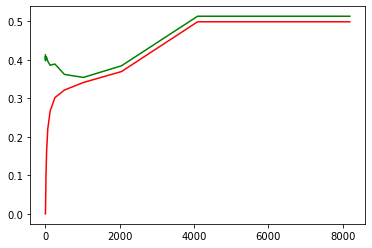

Best minParent:  10


In [4]:
# import math
# math.log(8192, 2) -> gives 13
minParent = [2**i for i in range(14)]
trainingError2 = []
validationError2 = []

# Find the best minParent
bestMinParent = 1
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth = 50, minParent = bestMinParent)
minValidationError = learner.err(Xva, Yva)
trainingError2.append(learner.err(Xtr, Ytr))
validationError2.append(learner.err(Xva, Yva))

for i in range(1, 14):
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth = 50, minParent = 2**i)
    trainingError2.append(learner.err(Xtr, Ytr))
    validationError2.append(learner.err(Xva, Yva))
    if learner.err(Xva, Yva) < minValidationError:
        minValidationError = learner.err(Xva, Yva)
        bestMinParent = i
    
plt.plot(minParent, trainingError2, "r")
plt.plot(minParent, validationError2, "g")
plt.show()

print("Best minParent: ", bestMinParent)

Higher minParent will have lower complexity, because overfitting does not seems to occur as minParent gets higher, as we observe both of the training and validation error are increasing.

From the calculation above, we know minParent = 10 provides the best decision tree model.

### 2.5

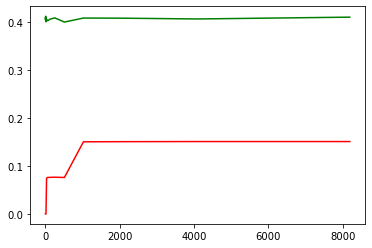

Best minLeaf:  9


In [5]:
# import math
# math.log(8192, 2) -> gives 13
minLeaf = [2**i for i in range(14)]
trainingError3 = []
validationError3 = []

# Find the best minParent
bestMinLeaf = 1
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth = 50, minLeaf = bestMinLeaf)
minValidationError = learner.err(Xva, Yva)
trainingError3.append(learner.err(Xtr, Ytr))
validationError3.append(learner.err(Xva, Yva))

for i in range(1, 14):
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth = 50, minLeaf = bestMinLeaf)
    trainingError3.append(learner.err(Xtr, Ytr))
    validationError3.append(learner.err(Xva, Yva))
    if learner.err(Xva, Yva) < minValidationError:
        minValidationError = learner.err(Xva, Yva)
        bestMinLeaf = i
    
plt.plot(minLeaf, trainingError3, "r")
plt.plot(minLeaf, validationError3, "g")
plt.show()

print("Best minLeaf: ", bestMinLeaf)

From the plot above, we could say that minParent controls complexity better than minLeaf, as we see the plot of minLeaf becomes almost a horizontal line as the value of minLeaf increases.

### 2.6

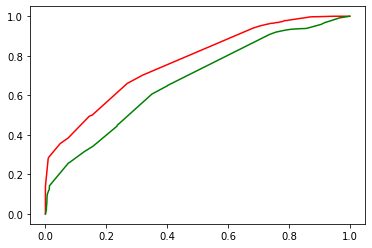

In [6]:
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth = 7, minParent = 1)
fpTr, tpTr, _ = learner.roc(Xtr, Ytr)
fpVa, tpVa, _ = learner.roc(Xva, Yva)
plt.plot(fpTr, tpTr, "r")
plt.plot(fpVa, tpVa, "g")
plt.show()

In [7]:
print("Training AUC Score: ", learner.auc(Xtr, Ytr))
print("Validation AUC Score: ", learner.auc(Xva, Yva))

Training AUC Score:  0.7744281026292843
Validation AUC Score:  0.6755652170629308


### 2.7

In [8]:
X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')
X,Y = ml.shuffleData(X,Y)
learner = ml.dtree.treeClassify(X, Y, maxDepth = 7, minParent = 10) # train a model using training data X,Y
Xte = np.genfromtxt('data/X_test.txt', delimiter=',')
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
# Output a file with two columns, a row ID and a confidence in class 1:
np.savetxt('Y_submit.txt',Yte,'%d, %.2f',header='Id,Predicted',delimiter=',')

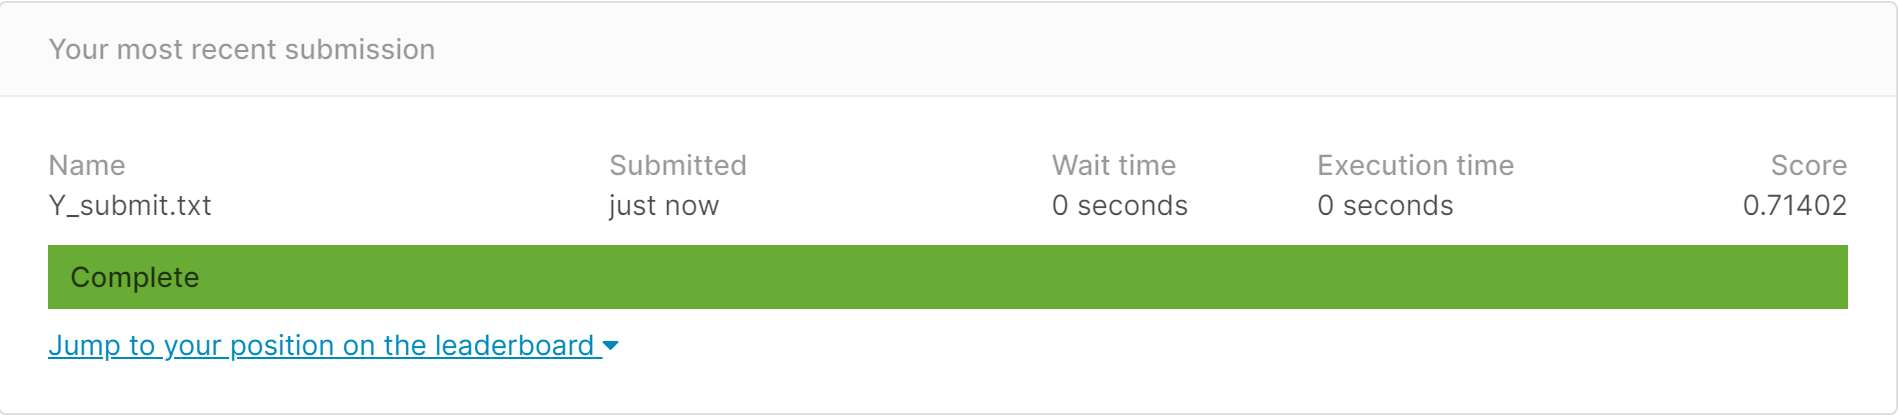
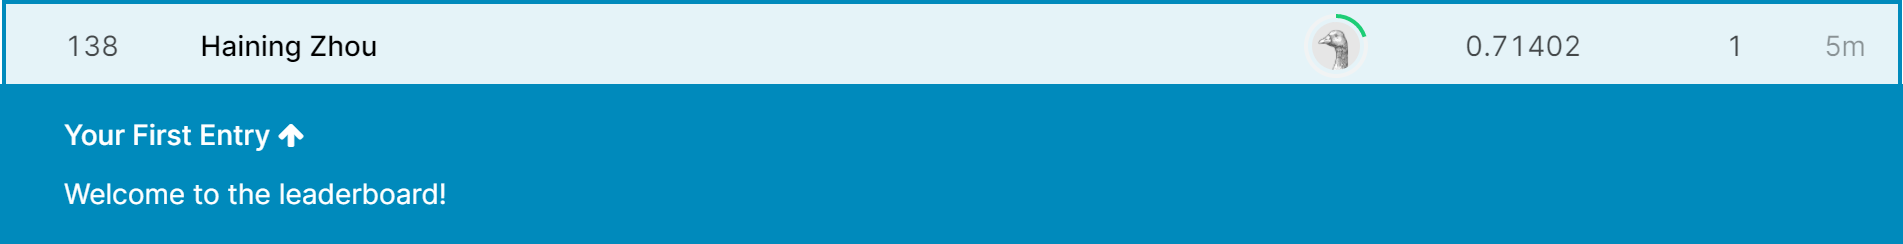

# Problem 3 (Using Random Forest)

### 3.1

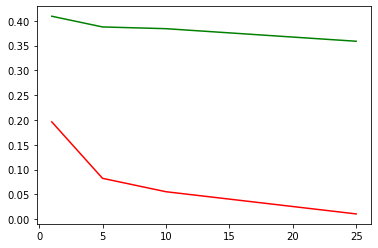

In [9]:
learners = [1, 5, 10, 25]
n1 = 50
n2 = 60
depth = 16
bag = 25
ensemble = 25*[0]
trainingError = []
validationError = []

for i in range(bag):
    x, y = ml.bootstrapData(Xtr, Ytr)
    ensemble[i] = ml.dtree.treeClassify(x,y,maxDepth=depth*2,minLeaf=4,nFeatures=n2)

for j in learners:
    Ytrhat = np.zeros((Xtr.shape[0],j))
    Yvahat = np.zeros((Xva.shape[0],j))
    for k in range(j):
        Ytrhat[:,k] = ensemble[k].predict(Xtr)
        Yvahat[:,k] = ensemble[k].predict(Xva)
    Ytrhat = np.mean(Ytrhat, axis=1) > 0.5
    Yvahat = np.mean(Yvahat, axis=1) > 0.5
    trainingError.append(np.mean(Ytrhat!=Ytr))     
    validationError.append(np.mean(Yvahat!=Yva))

plt.plot(learners, trainingError, "r")
plt.plot(learners, validationError, "g")
plt.show()

### 3.2

In [10]:
bag = learners[np.argmin(validationError)]
Ytehat = np.zeros((Xte.shape[0], bag))
for i in range(bag):
    Ytehat[:,i] = ensemble[i].predictSoft(Xte)[:,1]
Ytehat = np.mean(Ytehat, axis=1)
Yte = np.vstack((np.arange(Xte.shape[0]), Ytehat)).T
np.savetxt('Y_submit3.txt',Yte,'%d, %.2f',header='Id,Predicted',delimiter=',')

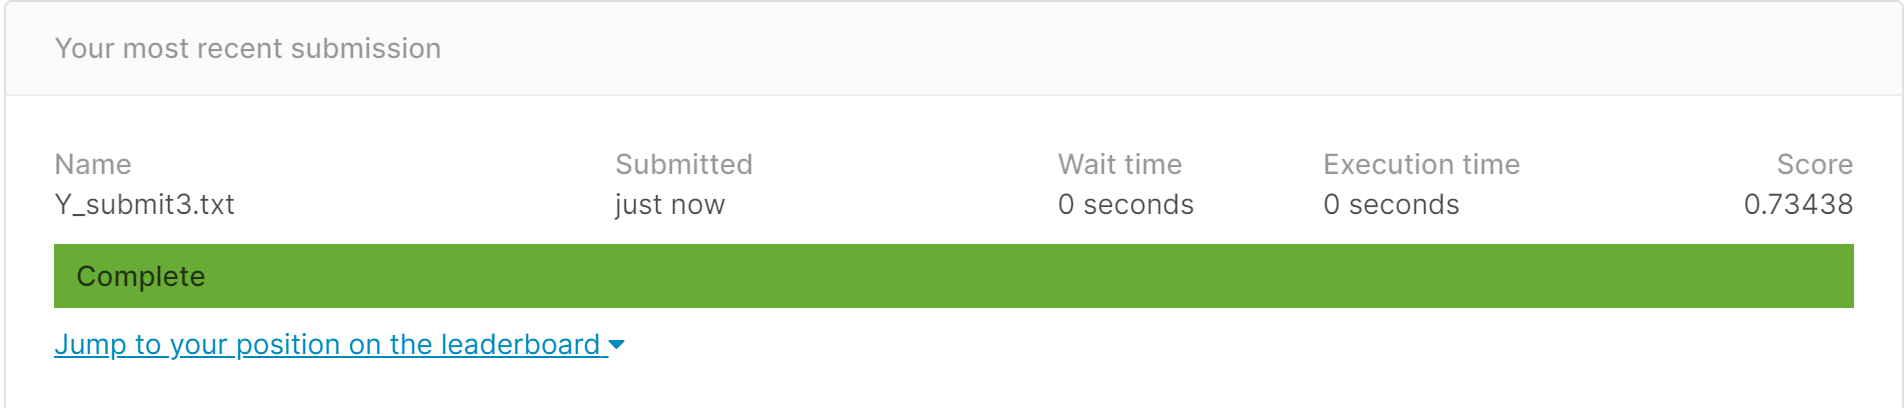
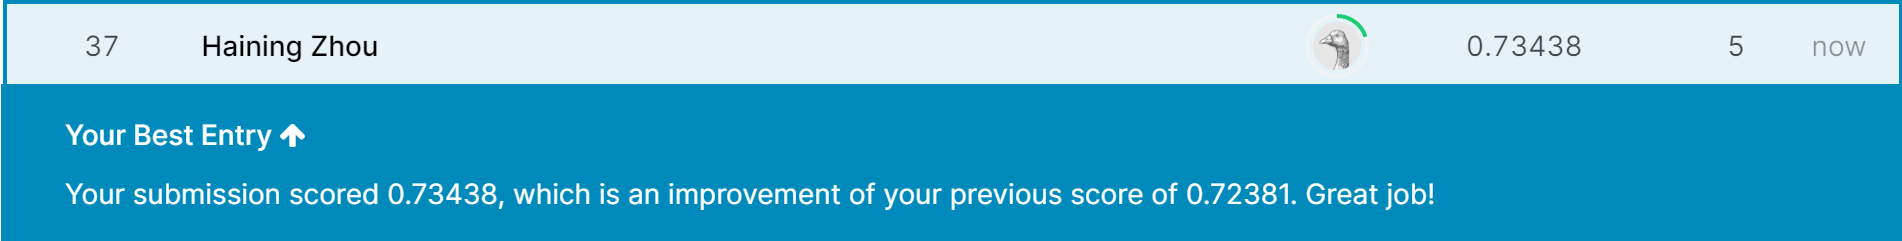

# Problem 4

For this homework, I rely mainly on the discussion posts by other students and the discussion materials. I also go back to the lecture slides to clarify myself some concepts. I do not collaborate with any other student.